# U.S. COVID-19 Vaccinations: Supply and Patient Therapy

Jeremy Barton <br>
07.04.2025

<b>Appendix</b>

[Introduction](#introduction)

[Preprocessing & Preliminary Preparation](#preprocessing-&-preliminary-preparation)

1. [Data Selection](#data-selection)
2. [Data Cleaning and Preparation](#data-cleaning-and-preparation)

[Exploratory Data Analysis](#exploratory-data-analysis)

1. [Describe the Variable Characteristics with Summary Statistics](#describe-the-variable-characteristics-with-summary-statistics) 
2. [Conduct Univariate Analysis](#conduct-univariate-analysis)
3. [Conduct Bivariate Analysis](#conduct-bivariate-analysis)
4. [Test Statistics](#test-statistics)
5. [Regression and Classification](#regression-and-classification)
6. [Advanced Analysis Techniques](#advanced-analysis-techniques)
7. [Conclusion](#Conclusion)

#### <b>Introduction</b>

The purpose of this paper is to understand the impact of Supply to patient therapy completion in the weeks following the roll out of vaccines during the 2019 COVID pandemic.

#### <b>Preprocessing & Preliminary Preparation</b>

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_rel
from scipy.stats import f_oneway
import statsmodels.api as sm
# from ml_utils.pca import pca_scatter_3d
# from ml_utils.pca import pca_scatter

vax_data = pd.read_csv('data/vax_totals.csv')
vaccine_eda = vax_data
cleaned_eda = vaccine_eda.copy
vaccine_eda.head(3)

,Date,MMWR_week,Location,Distributed,Administered,Admin_Per_100K,Recip_Administered,Administered_Dose1_Recip,Series_Complete_Yes,Additional_Doses,Second_Booster,Administered_Bivalent
0,10/30/2021,43,TX,44779195,34509513,119015,33678095,17794025,15467426,1448444.0,NaN,NaN
1,10/30/2021,43,NJ,15160695,12301100,138492,12664320,6662856,5892769,526010.0,NaN,NaN
2,12/27/2020,53,PA,291825,84826,663,0,0,0,NaN,NaN,NaN


##### Data Selection

Checking the shape of this dataset.

In [2]:
vaccine_eda.shape

(38488, 12)

38,488 records should be suitable for what we will be conducting in this paper. This data is provided by the United States Center for Disease Control (CDC) and the descriptions clearly indicate the role of each field. 

##### Data Cleaning and Preparation

Fill NaN values

In [3]:
vax_data.fillna(0)

,Date,MMWR_week,Location,Distributed,Administered,Admin_Per_100K,Recip_Administered,Administered_Dose1_Recip,Series_Complete_Yes,Additional_Doses,Second_Booster,Administered_Bivalent
0,10/30/2021,43,TX,44779195,34509513,119015,33678095,17794025,15467426,1448444.0,0.0,0.0
1,10/30/2021,43,NJ,15160695,12301100,138492,12664320,6662856,5892769,526010.0,0.0,0.0
2,12/27/2020,53,PA,291825,84826,663,0,0,0,0.0,0.0,0.0
3,12/27/2020,53,AK,45250,11427,1562,0,0,0,0.0,0.0,0.0
4,12/16/2020,51,WI,49725,192,3,0,0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
38483,12/13/2020,51,AS,3900,0,0,0,0,0,0.0,0.0,0.0
38484,12/13/2020,51,VI,975,0,0,0,0,0,0.0,0.0,0.0
38485,12/13/2020,51,MP,4875,0,0,0,0,0,0.0,0.0,0.0
38486,12/13/2020,51,US,13650,0,0,0,0,0,0.0,0.0,0.0


## <b>Exploratory Data Analysis (EDA) Tasks</b>

### <b>Describing the Variable Characteristics with Summary Statistics</b>

In this paper, we are claiming that the supply of vaccines affect the length of a patient's progression. More specifically, what impacts a surplus or deficit of vaccines (compared to the distribution of most) has on the completion of a second dose, booster, and additional doses.

The following are descriptions of variables used in the analysis. This is a subset containing totals from the full vaccinations dataset.

`Date`: Date data was reported on the CDC COVID Data Tracker

`MMWR`: Week of the epidemioligic year

`Location`: Jurisdictions (State/Territory/Federal Entity)

`Distributed`: Total number of deivered doses

`Administered`: Total number of administered doses based on the jurisdiction

`Recip_Administered`: Total number of doses administered based on the jurisdiction where recipient lives

`Series Complete`: Total number of people with a completed primary series (have second dose of a two-dose vaccine or one dose of a single-dose vaccine) based on the jurisdiction where recipient lives

`Additional Doses`: Total number of people who completed a primary series and have received a booster (or additional) dose.

`Second Booster`: Total number of people who have received a second booster dose in the US

`Bivalent`: Total number of people who have received an updated (bivalent) booster dose since September 1, 2022

In [4]:
# Statistical Summary
describe = vaccine_eda.describe()
pd.DataFrame(describe)

,MMWR_week,Distributed,Administered,Admin_Per_100K,Recip_Administered,Administered_Dose1_Recip,Series_Complete_Yes,Additional_Doses,Second_Booster,Administered_Bivalent
count,38488.000000,3.848800e+04,3.848800e+04,38488.000000,3.848800e+04,3.848800e+04,3.848800e+04,2.214000e+04,1.030000e+02,2.240000e+03
mean,23.434447,1.543719e+07,1.200731e+07,106028.730799,1.189764e+07,5.850952e+06,4.848940e+06,2.193483e+06,2.334271e+07,1.314796e+06
std,15.406757,6.751604e+07,5.312774e+07,65372.181129,5.313508e+07,2.537368e+07,2.142915e+07,1.008537e+07,1.465661e+07,5.600637e+06
min,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.065193e+06,0.000000e+00
25%,10.000000,9.751162e+05,7.383708e+05,57268.000000,5.764495e+05,3.316222e+05,1.374512e+05,2.103900e+04,1.204474e+07,1.015578e+05
50%,20.000000,3.837018e+06,2.961704e+06,112583.500000,2.870142e+06,1.497842e+06,1.147482e+06,4.793090e+05,1.638629e+07,3.213310e+05
75%,36.000000,1.004543e+07,7.860668e+06,153463.250000,7.711791e+06,3.907152e+06,3.263232e+06,1.502269e+06,3.802322e+07,9.155545e+05
max,53.000000,9.844443e+08,6.767288e+08,302852.000000,6.767288e+08,2.702272e+08,2.306373e+08,1.184383e+08,4.883936e+07,5.751261e+07


### <b>Conduct Univariate Analysis</b>

<b>For the key variables in this dataset, desciptive statistics will be calculated (mean, median, mode, variance, skewness, kurtosis).</b>

####

In [5]:
# This option disables scientific notation 
pd.set_option('display.float_format', '{:.0f}'.format)

# Group and compute mean
vaccine_stats = (
    vaccine_eda
    .groupby("Location", as_index=False)
    .agg({"Distributed": "mean", "Administered": "mean"})
)

# Fill NaNs with zero
vaccine_stats = vaccine_stats.fillna(0)

# Rename columns
vaccine_stats.rename(columns={
    "Distributed": "Avg Dist",
    "Administered": "Avg Admin"
}, inplace=True)

# Median
vaccine_stats["Med Dist"] = (
    vaccine_eda.groupby("Location")["Distributed"].median()
    .reindex(vaccine_stats["Location"]).fillna(0).values
)
vaccine_stats["Med Admin"] = (
    vaccine_eda.groupby("Location")["Administered"].median()
    .reindex(vaccine_stats["Location"]).fillna(0).values
)

# Mode
vaccine_stats["Mode Dist"] = (
    vaccine_eda.groupby("Location")["Distributed"]
    .apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
    .reindex(vaccine_stats["Location"]).fillna(0).values
)
vaccine_stats["Mode Admin"] = (
    vaccine_eda.groupby("Location")["Administered"]
    .apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
    .reindex(vaccine_stats["Location"]).fillna(0).values
)

# Kurtosis
vaccine_stats["Kurt Dist"] = (
    vaccine_eda.groupby("Location")["Distributed"]
    .apply(pd.Series.kurt)
    .reindex(vaccine_stats["Location"]).fillna(0).values
)
vaccine_stats["Kurt Admin"] = (
    vaccine_eda.groupby("Location")["Administered"]
    .apply(pd.Series.kurt)
    .reindex(vaccine_stats["Location"]).fillna(0).values
)

vaccine_stats

,Location,Avg Dist,Avg Admin,Med Dist,Med Admin,Mode Dist,Mode Admin,Kurt Dist,Kurt Admin
0,AK,1060955,779085,1089275,810238,271550,946031,-0,-1
1,AL,6365886,4153595,6829510,4624892,39000,5191035,-1,-1
2,AR,4014389,2815701,4161500,3085323,25350,40879,-1,-1
3,AS,72018,63402,67550,63123,54030,0,-1,-1
4,AZ,9893396,7959849,10143070,8370474,58500,9458251,-1,-1
...,...,...,...,...,...,...,...,...,...
61,VT,1146741,929108,1075350,917788,22125,1101607,-1,-1
62,WA,11702485,9547576,11675975,9864304,221150,11228003,-1,-1
63,WI,7740788,6820004,7710425,6936268,49725,8080069,-1,-1
64,WV,2691873,1763784,3032115,1567789,16575,1689798,-1,-1


The key varibles in this analysis are Adminstered, Distributed, (predictor variable) and Series Complete, Additional Dose, Second booster and Bivalent (target variable). We will begin with a histogram distribution of the mean Administered Doses. This distribution is identical the Distributed field.

There is an outlier in the data that we can see visually, which is the "US" category. It makes up several territories, so to limit the scope it will be removed. We are interested only in the fifty states of the United States of America.

<Axes: xlabel='Location'>

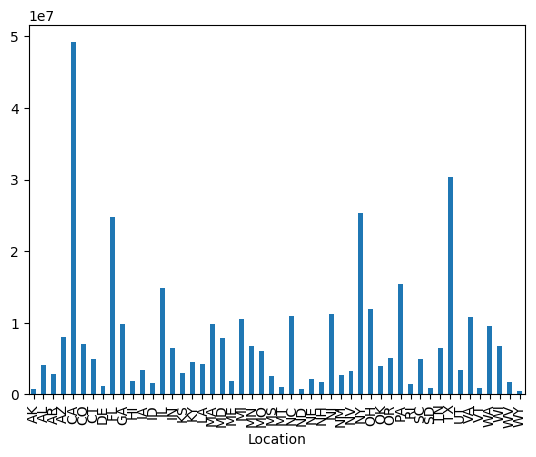

In [6]:
state_codes = [
    'AL','AK','AZ','AR','CA','CO','CT','DE','FL','GA',
    'HI','ID','IL','IN','IA','KS','KY','LA','ME','MD',
    'MA','MI','MN','MS','MO','MT','NE','NV','NH','NJ',
    'NM','NY','NC','ND','OH','OK','OR','PA','RI','SC',
    'SD','TN','TX','UT','VT','VA','WA','WV','WI','WY'
]

vaccine_stats = vaccine_stats[vaccine_stats['Location'].isin(state_codes)]
vaccine_eda   = vaccine_eda[vaccine_eda['Location'].isin(state_codes)]

vaccine_stats.groupby('Location')['Avg Admin'].sum().plot(kind='bar')

After filtering, California and Texas are the states with the two highest populations of Administered doses.

We can also tell the data is not standardized as the mean is not zero.


In [7]:
eda_mean = vaccine_eda['Administered'].mean()
std = vaccine_eda.select_dtypes(include='number').std()
print(f"Mean Admnistered: {eda_mean}")
print(f"Standard deviations:\n {std}")

Mean Admnistered: 7442972.890753768
Standard deviations:
 MMWR_week                        15
Distributed                13274912
Administered               10581732
Admin_Per_100K                60211
Recip_Administered         10570051
Administered_Dose1_Recip    5018246
Series_Complete_Yes         4230304
Additional_Doses            2071691
Second_Booster                  NaN
Administered_Bivalent       1090702
dtype: float64


In order to standardize it, we use the `MinMaxScaler` from sci-kit learn.

In [8]:
# This is to apply fitting to numeric columns only
n = vaccine_eda.select_dtypes(include='number') # Safety first.

vaccine_eda[n.columns] = (n - n.mean()) / n.std()


/tmp/ipykernel_157099/3242686042.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vaccine_eda[n.columns] = (n - n.mean()) / n.std()


Let's revisit the distribution.

In [9]:
eda_mean = vaccine_eda['Administered'].mean()
std = vaccine_eda.select_dtypes(include='number').std()
eda_mean
std


MMWR_week                    1
Distributed                  1
Administered                 1
Admin_Per_100K               1
Recip_Administered           1
Administered_Dose1_Recip     1
Series_Complete_Yes          1
Additional_Doses             1
Second_Booster             NaN
Administered_Bivalent        1
dtype: float64

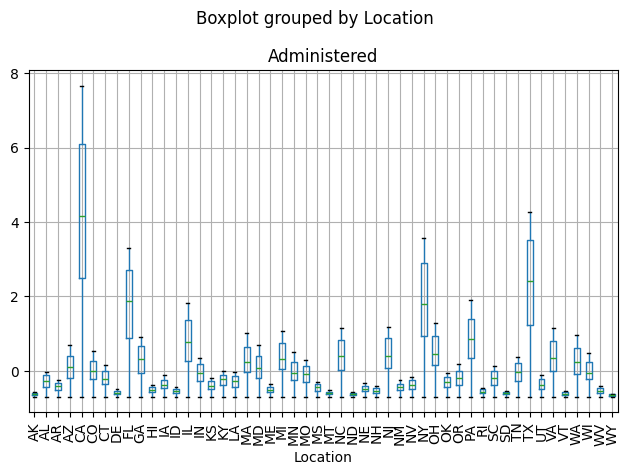

In [10]:
vaccine_eda.boxplot(column='Administered', by='Location', rot=90)
plt.tight_layout()
plt.show()

California is expected to have a higher number of adminstered vaccines due to it's population. This is supported by the volume (and high-points) of other known highly populated states like Texas and New York.

Because of this we can determine there are no more significant outliers. Therefore no further trimming is needed.

### <b>Conduct Bivariate Analysis</b>

<b>a. Calculate covariance and correlation</b>

####

In [11]:
vaccine_corr = vaccine_eda.select_dtypes(include='number')
vaccine_corr = vaccine_corr.drop('Admin_Per_100K', axis=1)
vaccine_corr = vaccine_corr.fillna(0)
vax_data.shape


(38488, 12)

We will use the Person correlation to calculate covariance and correlation between the variables in `vaccine_eda`.

<Axes: >

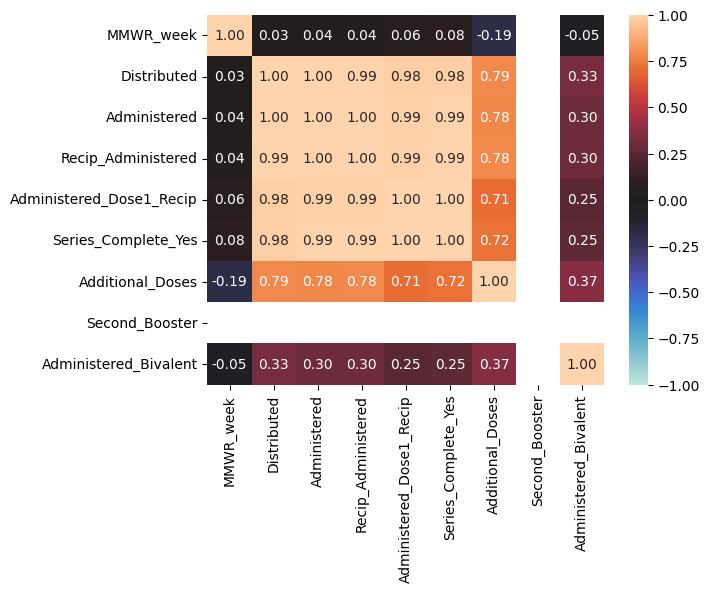

In [12]:
sns.heatmap(vaccine_corr.corr(), vmin=-1, vmax=1, center=0, annot=True, fmt='.2f')

Each cell shows the correclation coefficient between two variables. A perfect correlation means the relationship is reciprical. As one increases or decreases, so does the other.

+1.00 represemts perfect positive correlation <br>
0.00 is no linear correlation <br>
-1.00 represent perfect negative correlation

Focusing in on the variables we're interested in for the analysis, it looks like the number of vaccines Adminstered and Distributed has had a near perfect correlation with the different stages of therapy completion.

Between `Distributed` and `Administered` there is a <b>97 - 99%</b> correlation with those who complete a Series (meaning sucessfully completed a first dose to complete the first administration). This is expected, and what we would hope the outcome would be for a completed series.

However, this correlation decreases the further along the timeline. By the time we reach patients who have had continued therapy, represented by `Administered_Bivalent` there is a less than 35% correlation.



<b>IMPORTANT NOTE:</b><br>
It may have occured to us that the `Second_Booster` field isn't included in the above heatmap. This is because the 'US' field dropped earlier from `Location` included all patients who received a second booster. If we were to include that field in our heatmap it will follow a similar trend to the other therapy stages.

In [13]:
vax_data

,Date,MMWR_week,Location,Distributed,Administered,Admin_Per_100K,Recip_Administered,Administered_Dose1_Recip,Series_Complete_Yes,Additional_Doses,Second_Booster,Administered_Bivalent
0,10/30/2021,43,TX,44779195,34509513,119015,33678095,17794025,15467426,1448444,NaN,NaN
1,10/30/2021,43,NJ,15160695,12301100,138492,12664320,6662856,5892769,526010,NaN,NaN
2,12/27/2020,53,PA,291825,84826,663,0,0,0,NaN,NaN,NaN
3,12/27/2020,53,AK,45250,11427,1562,0,0,0,NaN,NaN,NaN
4,12/16/2020,51,WI,49725,192,3,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
38483,12/13/2020,51,AS,3900,0,0,0,0,0,NaN,NaN,NaN
38484,12/13/2020,51,VI,975,0,0,0,0,0,NaN,NaN,NaN
38485,12/13/2020,51,MP,4875,0,0,0,0,0,NaN,NaN,NaN
38486,12/13/2020,51,US,13650,0,0,0,0,0,NaN,NaN,NaN


<Axes: >

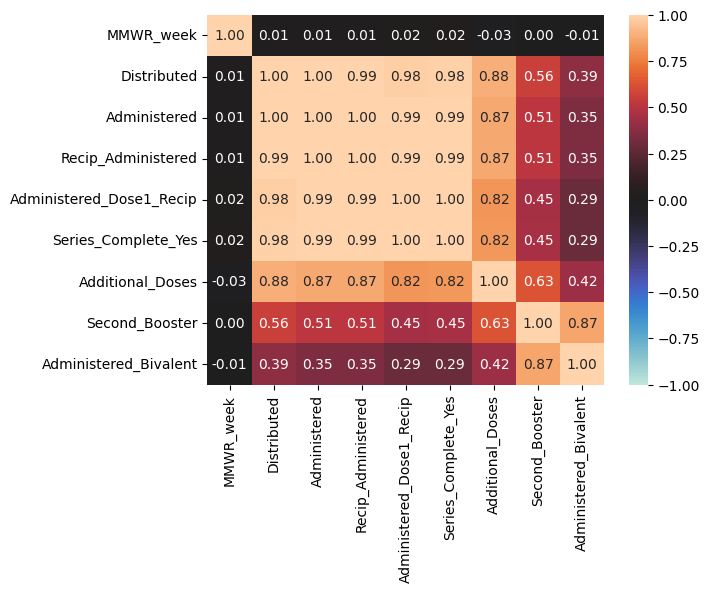

In [14]:
vaccine_eda = vax_data
vaccine_eda.fillna(0)

vaccine_eda = vaccine_eda.select_dtypes(include='number')
vaccine_eda = vaccine_eda.drop('Admin_Per_100K', axis=1)
vaccine_eda = vaccine_eda.fillna(0)
vaccine_eda.shape

sns.heatmap(vaccine_eda.corr(), vmin=-1, vmax=1, center=0, annot=True, fmt='.2f')

The administration and distribution of vaccines had a 35 - 39% correlation with recieving continued therapy, represented by "Administered Bivalent".

This version of the dataset containing the outlier will be included in the exploratory data analysis moving forward. It is not expected that this will cause an issue in predicting stage completion.

We will continue the EDA by creating a pair plot on the vaccine_eda dataset. 

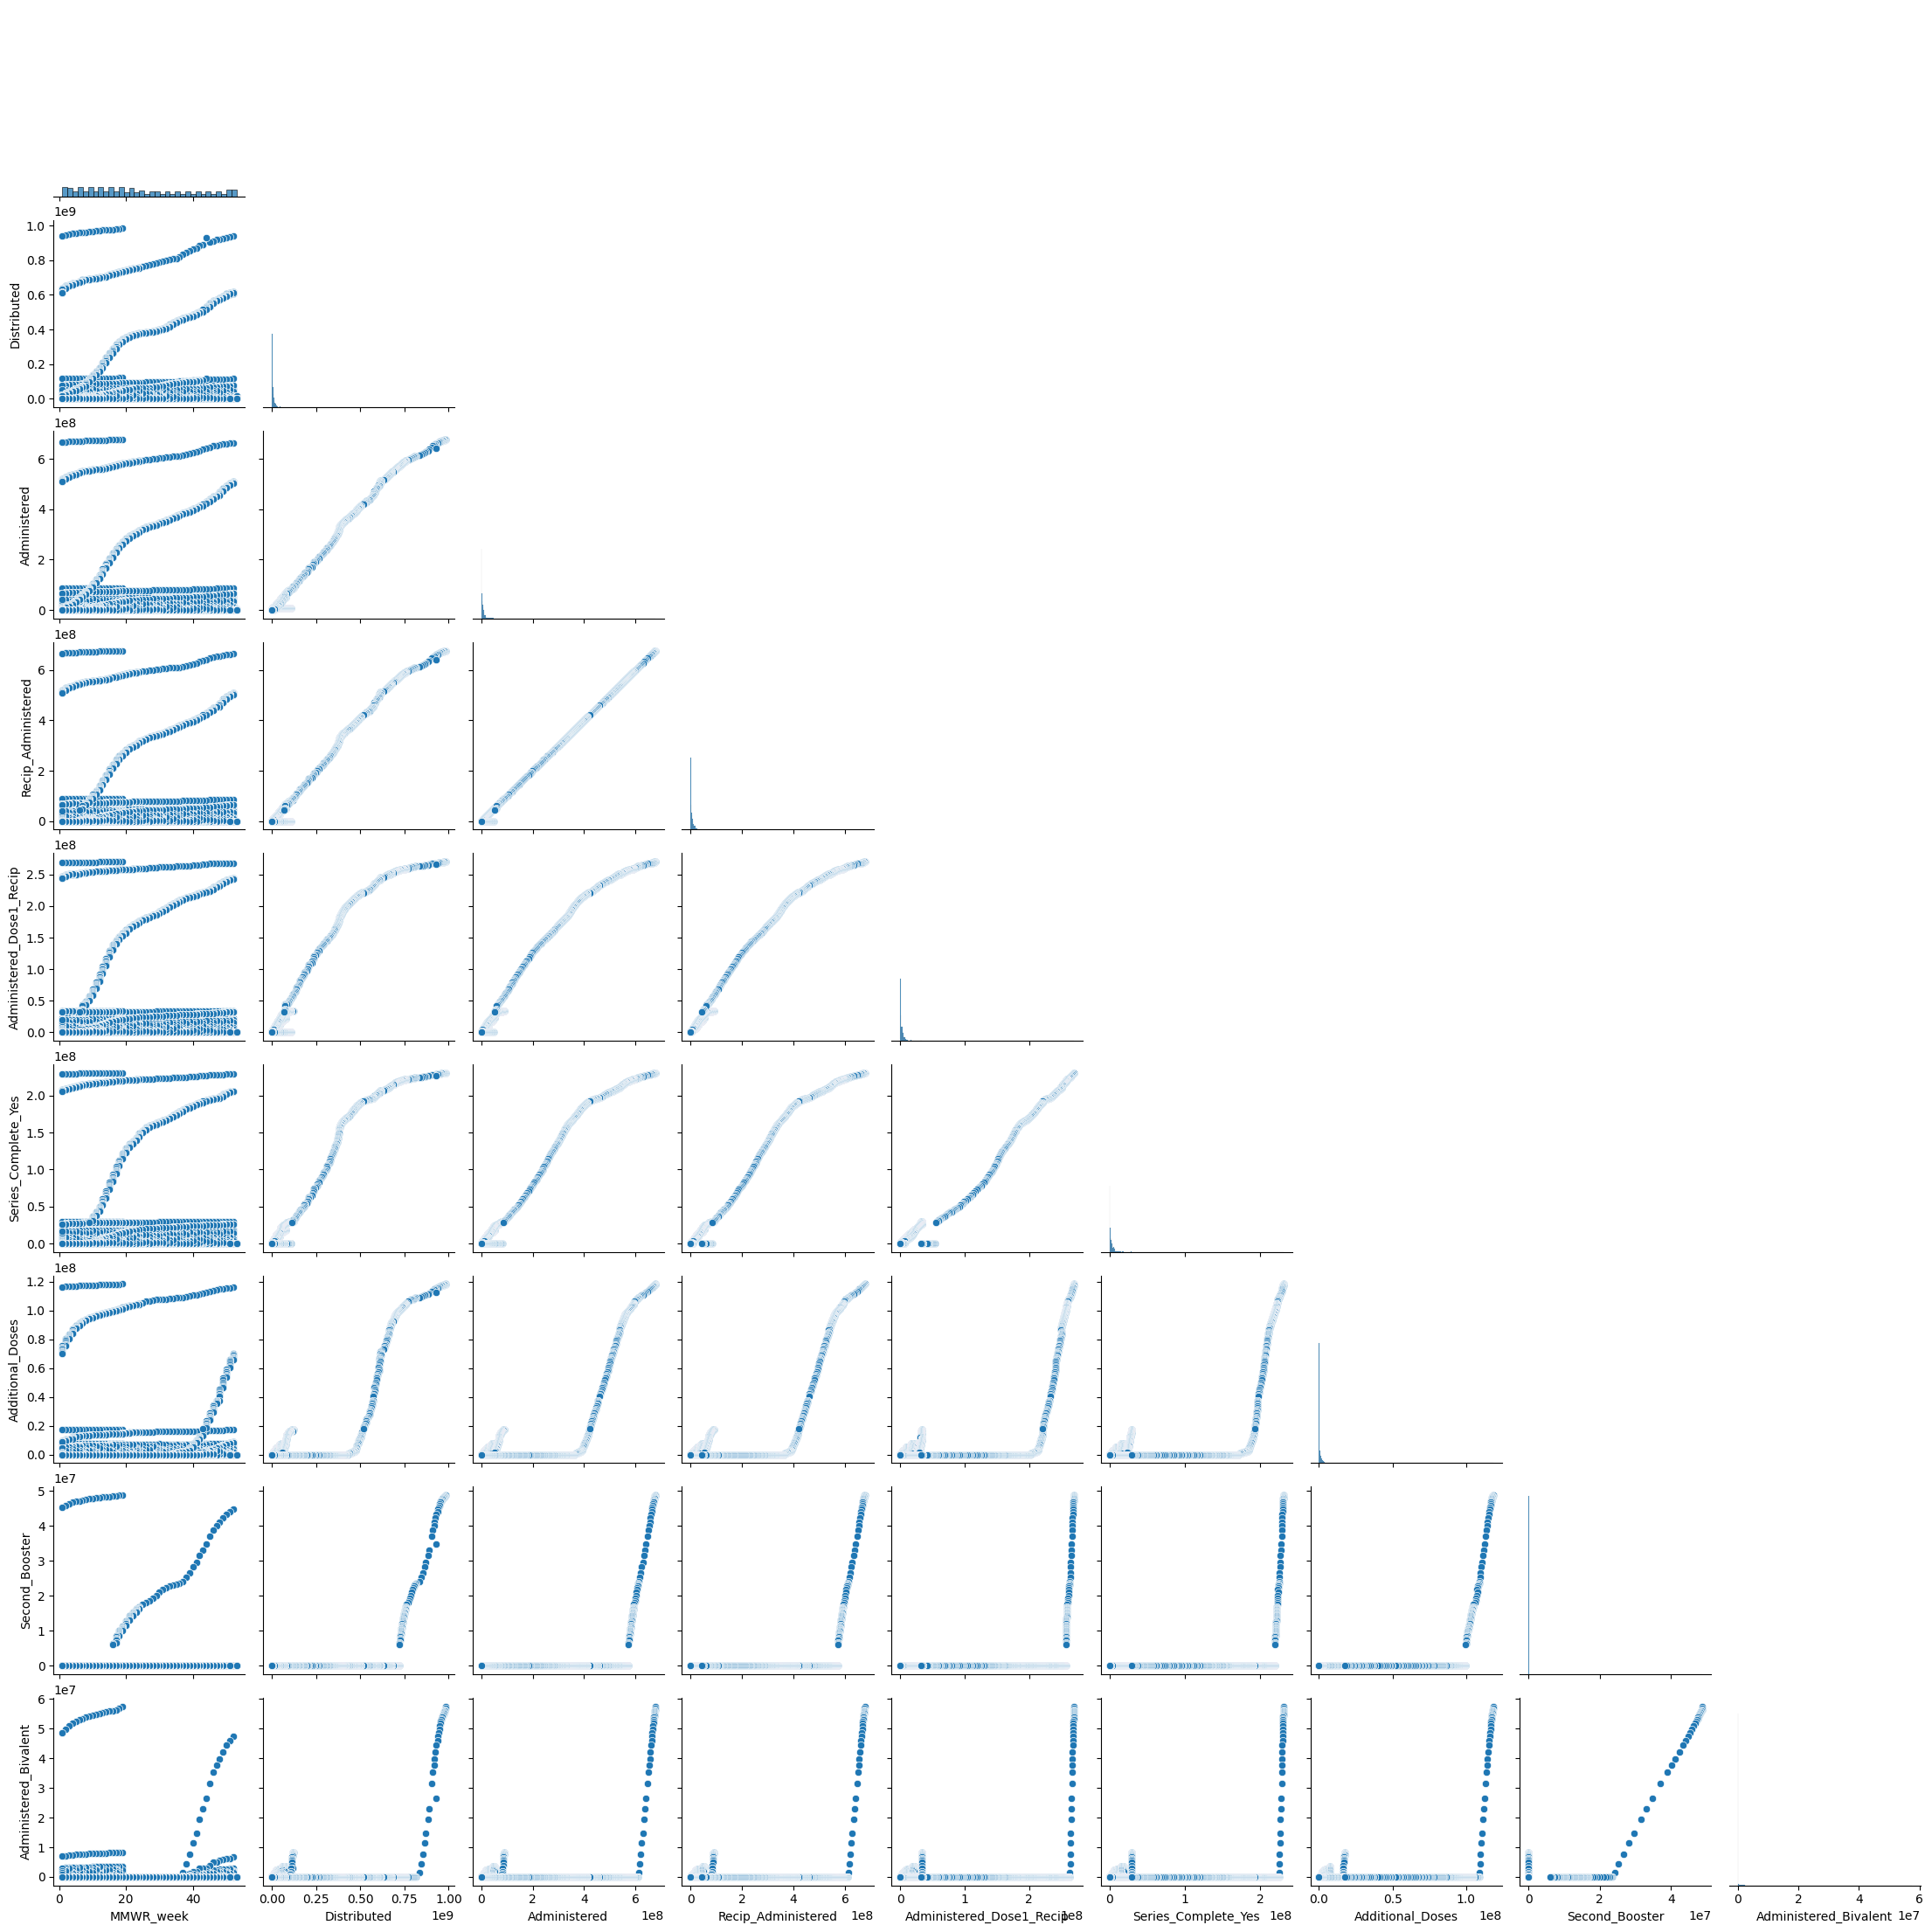

In [15]:
sns.pairplot(vaccine_eda, corner=True)

We can infer from the above pairplot that there is strong positve correlation between all of our diagonal cells.

### <b>Test Statistics</b>

The hypothsis for this analysis is that Supply has an affect on the stages of therapy continuation. We've proved in the previous section that the correlation between our control variables and the completion stages is from 98% on the first dose down to 39% for continued vaccinations.

However since correlation does not equal causation, statistical tests must be performed to prove the significance of the control variables. 

<b>The t-test</b>
#####

A t-test compares the means of groups to determine if they're statistically different. For this test we're comparing whether the mean between Administered and Distributed is statistically different. This will help us understand any gaps between supply and demand.

In [16]:
# Performing a T test

t_stat, p_val = ttest_rel(vaccine_eda['Administered'], vaccine_eda['Distributed'])

print(f"t-statistic: {t_stat}, p-value: {p_val}")


t-statistic: -43.79709557284322, p-value: 0.0


A T-stat of -43.8 is very low, which shows an extremely strong difference in the two variables. This means there were significantly less Admnistered than Distributed.

Knowing this helps to gain a clearer understanding of the data. Choosing one or the other to represent Supply will return innaccurate results. To now add a `Supply` column to the vaccine_eda table we can subtract the Administered from the Distributed.

In [17]:
vaccine_eda['Supply'] = vaccine_eda['Distributed'] - vaccine_eda['Administered']
vaccine_eda = vaccine_eda.drop(columns=['Distributed', 'Administered'])

Returning to the correlation heatmap with a new Supply field.

In [18]:
vaccine_stats = vaccine_eda.copy()

<Axes: >

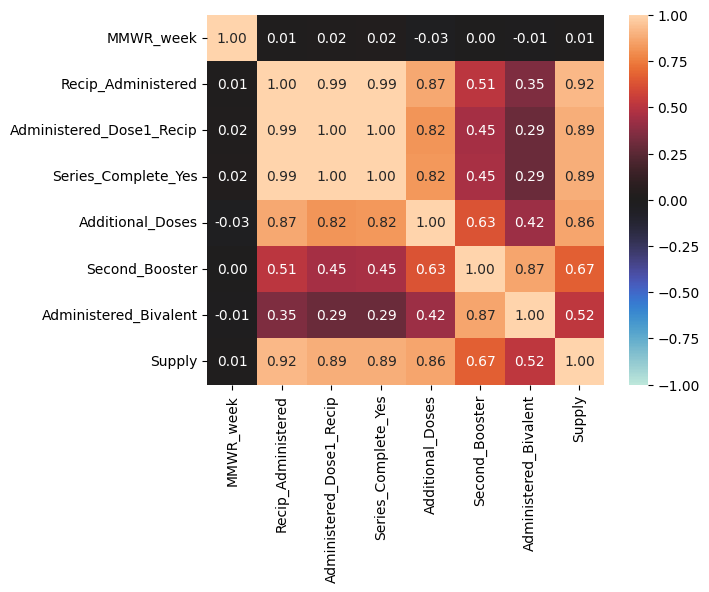

In [19]:
vaccine_corr = vaccine_eda.select_dtypes(include='number')
vaccine_corr = vaccine_eda.fillna(0) 
sns.heatmap(vaccine_corr.corr(), vmin=-1, vmax=1, center=0, annot=True, fmt='.2f')

Supply follows a similar trend as Distributed and Administered, except the correlation is slightly lower. There's an 89% correlation between Supply and completion of the Series. As supply decreases, the correlation in stages of therapy does as well.

It may be a stretch, but let's try to plot the correlations on the y axis accross the different stages on the x axis. Looking at the heatmap above it's already reading as a time series graph by how the stages are ordered at the bottom.

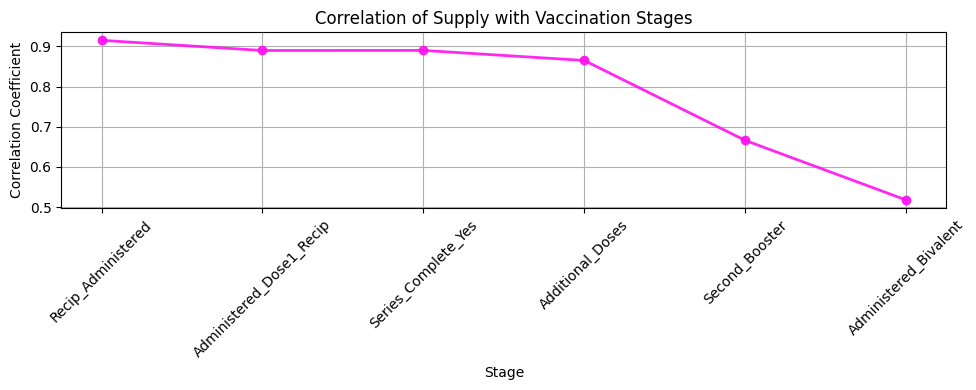

In [20]:
import matplotlib.pyplot as plt

# Define stage columns
stages = ['Recip_Administered', 'Administered_Dose1_Recip', 'Series_Complete_Yes',
          'Additional_Doses', 'Second_Booster', 'Administered_Bivalent']

# Compute correlations between Supply and each stage
supply_corr = vaccine_eda[stages + ['Supply']].corr()['Supply'].drop('Supply')

# Plot
plt.figure(figsize=(10, 4))
supply_corr.plot(kind='line', marker='o', linewidth=2, alpha=0.9, color='#FF10F0')  # Neon pink

plt.title('Correlation of Supply with Vaccination Stages')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Stage')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


The above graph shows the correlation between supply and the completed stages decreasing as time.

What we would really like know now is if Supply is statistically significant to the different stages of completion. For this a Linear Regression model can be applied.

<b>Linear Regression</b>
#####

In order to perform Linear Regression the data will need to be converted into long format with the Stages of comletion as the x and Supply as the y.

Linear regression models the relationship between a dependent varaible and one or more independent variables using a linear equation. In this case, the dependent variable is `Supply` and the independent variables are the different patient outcomes (or stages of completion).

In [21]:
# Build stage column headers
stages = ['Recip_Administered', 'Administered_Dose1_Recip', 'Series_Complete_Yes', 'Additional_Doses', 'Second_Booster', 'Administered_Bivalent']

# Prepare data for anova by melting 
anova = vaccine_eda.melt(id_vars=['Supply'], value_vars=stages, # Make supply the values
                                  var_name='Stage', value_name='StageValue') # Stages are the fields

The goal is to determine if at least one predictor significantly contributes to the outcome.

The module `statsmodels` offers a way to perform Linear Regression and show the results in a summary. Since we have multiple y values, only the R-squared and p value will be extracted.

In [22]:
import statsmodels.api as sm

X = vaccine_eda[['Supply']]
X = sm.add_constant(X)

for stage in ['Recip_Administered', 'Administered_Dose1_Recip', 'Series_Complete_Yes',
              'Additional_Doses', 'Second_Booster', 'Administered_Bivalent']:
    y = vaccine_eda[stage]
    model = sm.OLS(y, X).fit()
    print(f"{stage}:\nR-squared: {model.rsquared:.3f}, p-value: {model.f_pvalue:.3e}, MSE: {model.mse_resid:.3f}\n")


Recip_Administered:
R-squared: 0.837, p-value: 0.000e+00, MSE: 459232911082913.250

Administered_Dose1_Recip:
R-squared: 0.792, p-value: 0.000e+00, MSE: 134172641156494.844

Series_Complete_Yes:
R-squared: 0.792, p-value: 0.000e+00, MSE: 95531289873629.484

Additional_Doses:
R-squared: 0.748, p-value: 0.000e+00, MSE: 15035056064715.451

Second_Booster:
R-squared: 0.443, p-value: 0.000e+00, MSE: 1126376263654.402

Administered_Bivalent:
R-squared: 0.268, p-value: 0.000e+00, MSE: 1405490805782.905



<b>R-Squared and P Values</b>
#####

According the the R-square and p values above, the earlier stages can be explained by Supply. However, beyond Additional Doses, Supply becomes less effective. This suggests that other controlling variables may be at play.

<b>c. Explain the test statistics results, interpret p-values and draw conclusion  </b>

####

A p-value of 0 (or near 0) means there is strong statistical evidence against the null hypothesis. In other words, we reject the null hypothesis and accept the alternative hypothesis — that Supply has a statistically significant effect on the stages of vaccine completion.

### <b>Regression and Classification</b>

To check the accuracy of our linear regression model further, we could find the error size with RMSE and run a residuals analysis.

<b>a. Regression Analysis</b>

####

RSME Score
#####

The RMSE measures the average magnitude of the prediction error. The closer an RMSE score is to zero the more accurate the prediction was. It is calculated by squaring the MSE.

In the output above,  the MSE is shown. Below we convert it to RSME scores.

In [23]:
from sklearn.linear_model import LinearRegression
for stage in ['Recip_Administered', 'Administered_Dose1_Recip', 'Series_Complete_Yes',
              'Additional_Doses', 'Second_Booster', 'Administered_Bivalent']:
    y = vaccine_eda[stage]
    
    mask = y.notna()
    y = y[mask]
    X_stage = X.loc[mask]
    
    lm = LinearRegression()
    lm.fit(X_stage, y)
    
    y_pred = lm.predict(X_stage)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    nrmse = rmse / y.mean()
    
    print(f"{stage}\nRMSE: {rmse:.3f}\nNRMSE: {nrmse:.3%}\n")


Recip_Administered
RMSE: 21429163.479
NRMSE: 180.113%

Administered_Dose1_Recip
RMSE: 11582990.502
NRMSE: 197.968%

Series_Complete_Yes
RMSE: 9773756.988
NRMSE: 201.565%

Additional_Doses
RMSE: 3877405.676
NRMSE: 307.294%

Second_Booster
RMSE: 1061281.175
NRMSE: 1698.898%

Administered_Bivalent
RMSE: 1185503.172
NRMSE: 1549.250%



Interpreting the above, an RMSE a score of 21M on the `Recip_Administered` on average tells us the predictions were off by about 21 million doses. However, it is in it's raw form currently. By normalizing it we can attempt to improve the interpretability of these scores.

Normalized Root Mean Square Error (NRMSE) provides a standard metric to comapre model performance and it's output can be converted to a percentage. Reading the NRMSE scores below the RMSE the 21M doses, the model is off by 180%. Something comes to mind though:

<i>How much of this error can be explained by the `US` outlier?</i>

To find this out we can remove the US outlier in a new variable created from the `vaccine_eda` variable.


In [24]:
# Reload vaccine data
vax_data = pd.read_csv('/home/jeremy/Documents/GitHub/DSC530/TermProject/data/vax_totals.csv')
vaccine_eda = vax_data
vaccine_eda.head(3)

# Reapply Supply field
vaccine_eda['Supply'] = vaccine_eda['Distributed'] - vaccine_eda['Administered']
vaccine_eda = vaccine_eda.drop(columns=['Distributed', 'Administered'])

# Remove locations that include `US`
cleaned_eda = vax_data[vax_data['Location'] != 'US']
X_clean = X.loc[cleaned_eda.index]  # align X to cleaned_eda

# iterate through stages and print RMSE, NRMSE
for stage in ['Recip_Administered', 'Administered_Dose1_Recip', 'Series_Complete_Yes',
              'Additional_Doses']:
    y = cleaned_eda[stage]
    mask = y.notna()
    y = y[mask]
    X_stage = X_clean.loc[mask]
    
    lm = LinearRegression()
    lm.fit(X_stage, y)
    
    y_pred = lm.predict(X_stage)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    nrmse = rmse / y.mean()
    
    print(f"{stage}\nRMSE: {rmse:.3f}\nNRMSE: {nrmse:.3%}\n")



Recip_Administered
RMSE: 8893374.979
NRMSE: 145.248%

Administered_Dose1_Recip
RMSE: 4266858.224
NRMSE: 141.625%

Series_Complete_Yes
RMSE: 3590481.629
NRMSE: 143.811%

Additional_Doses
RMSE: 1691516.469
NRMSE: 151.376%



The model improved 20% with the removal of the outlier. However, we did note that all data points in the 'US' location receievd a `Second_Booster` which was not found in any other states. This is likely due to state-specific data not being available for the second booster.

Residual Analaysis
##### 

Residual analysis is a statistical technique used to asses the accuracy of regression models. Through exploring differences between the observed and predicted values, a residual analysis provides information about the aqequacy of the model fit. It is used by researchers and analysts to better undertand the reliablility of the model's results.

Recip_Administered
RMSE: 8893609.704
NRMSE: 145.252%



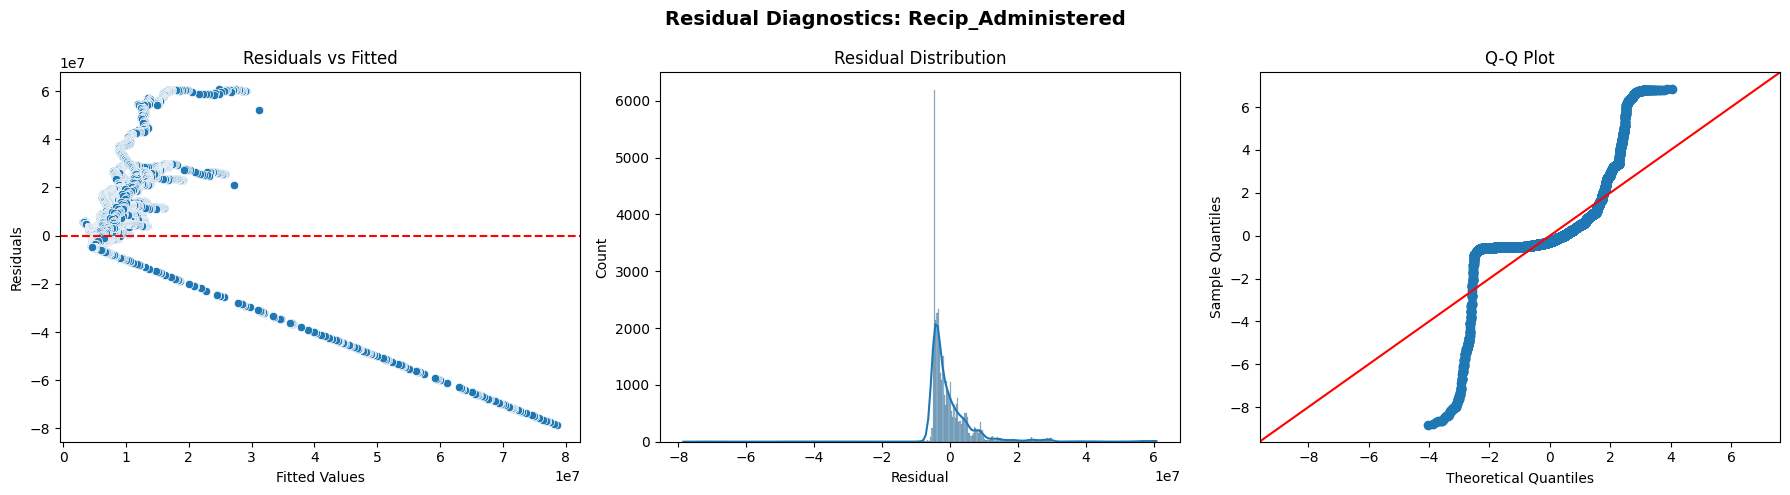

Administered_Dose1_Recip
RMSE: 4266970.841
NRMSE: 141.629%



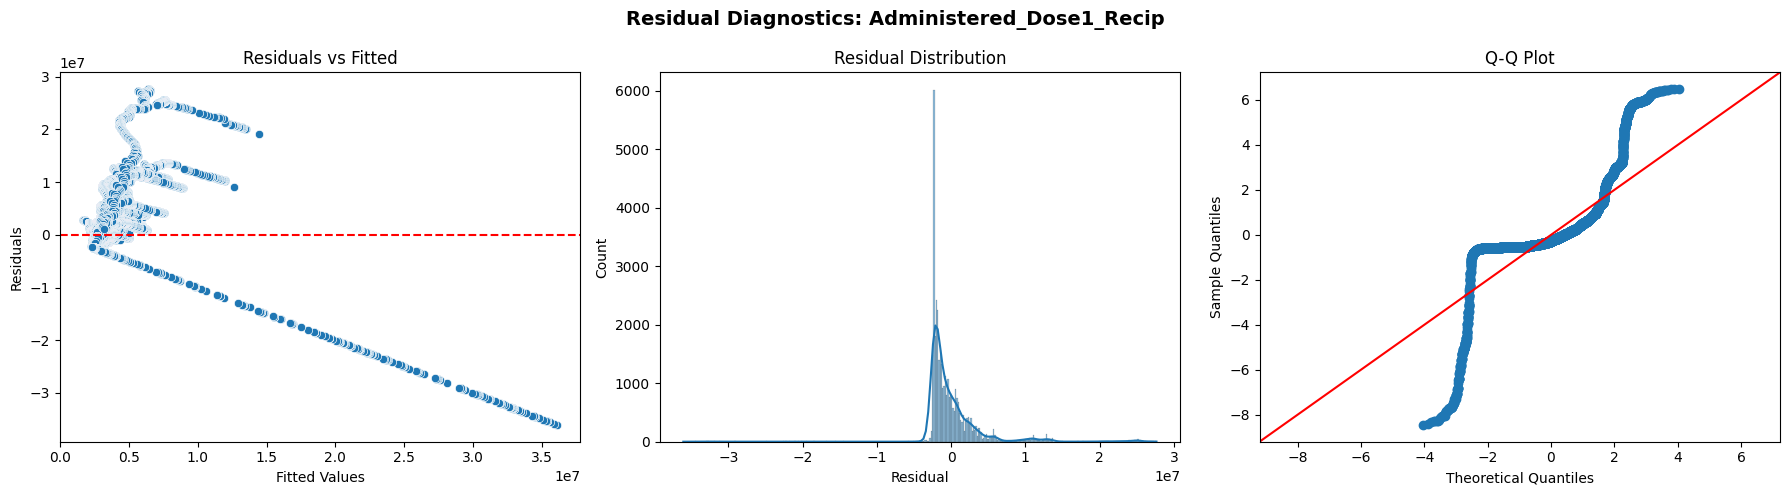

Series_Complete_Yes
RMSE: 3590576.394
NRMSE: 143.815%



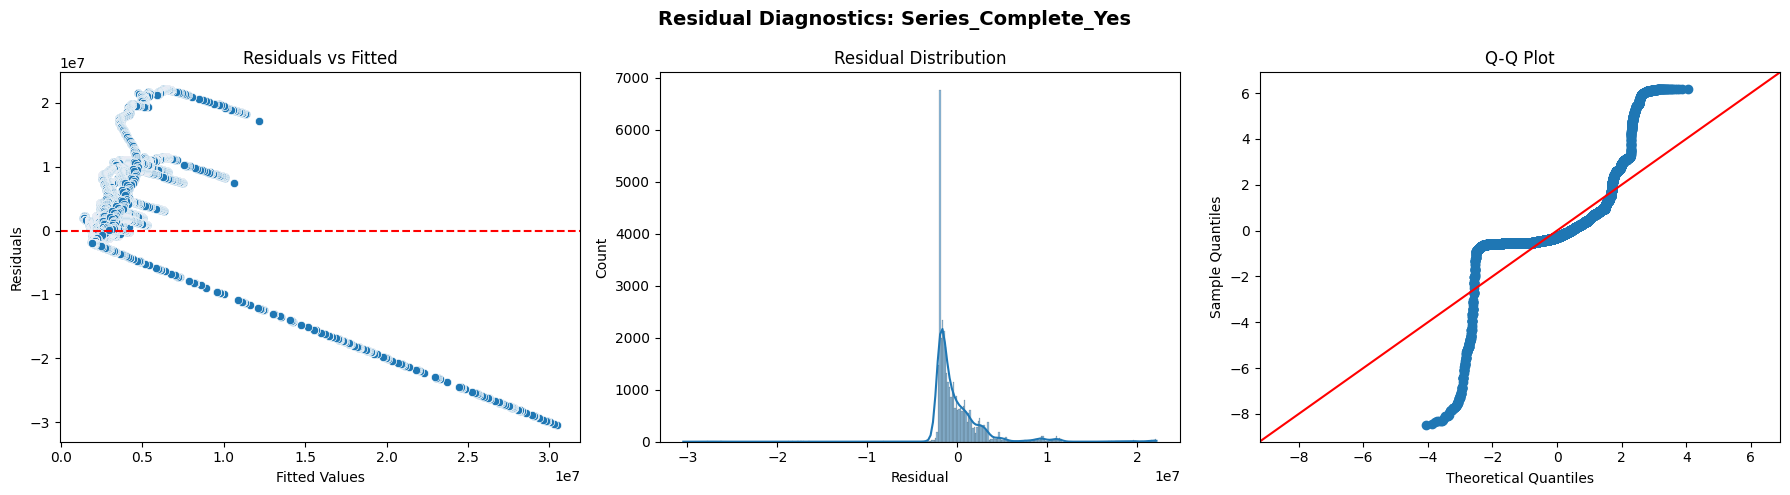

Additional_Doses
RMSE: 1691594.085
NRMSE: 151.383%



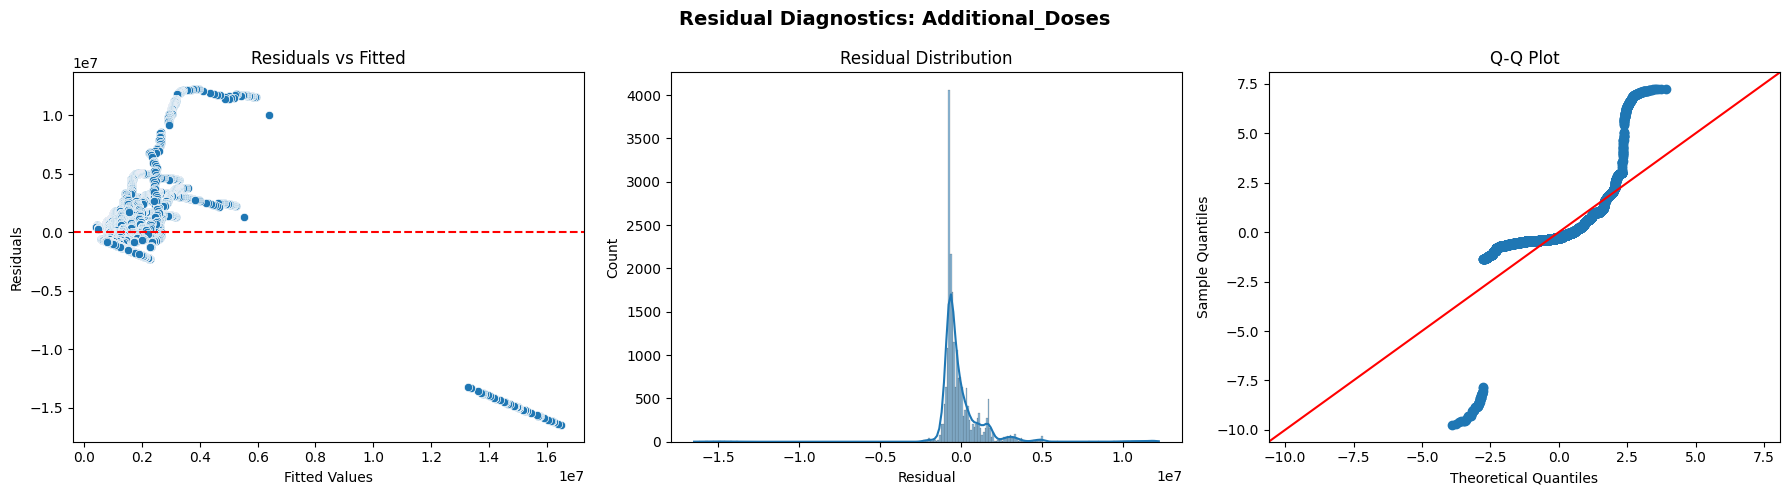

In [25]:
import warnings

try:
    for stage in stages:
        y = cleaned_eda[stage]
        mask = y.notna()
        y = y[mask]
        X_stage = X_clean.loc[mask]
        model = sm.OLS(y, X_stage).fit()
        rmse = np.sqrt(model.mse_resid)
        nrmse = rmse / y.mean()
        print(f"{stage}\nRMSE: {rmse:.3f}\nNRMSE: {nrmse:.3%}\n")
        residuals = model.resid
        fitted = model.fittedvalues

        fig, axes = plt.subplots(1, 3, figsize=(18, 5))
        fig.suptitle(f'Residual Diagnostics: {stage}', fontsize=14, fontweight='bold')

        # Residuals vs Fitted
        sns.scatterplot(x=fitted, y=residuals, ax=axes[0])
        axes[0].axhline(0, color='red', linestyle='--')
        axes[0].set_title('Residuals vs Fitted')
        axes[0].set_xlabel('Fitted Values')
        axes[0].set_ylabel('Residuals')

        # Histogram of residuals
        sns.histplot(residuals.to_numpy(), kde=True, ax=axes[1])
        axes[1].set_title('Residual Distribution')
        axes[1].set_xlabel('Residual')
        axes[1].set_ylabel('Count')

        # Q-Q Plot
        sm.qqplot(residuals, line='45', fit=True, ax=axes[2])
        axes[2].set_title('Q-Q Plot')

        plt.tight_layout()
        plt.show()

except ValueError:
    pass

<b>Classification Model</b>

####

Since this model is based on a  standard method, we cannot use classifiction techniques such as K Nearest Neighbor that require a supervised classification algorithm. 

Instead to perform classification we'll use K-Mean clustering.

In [26]:
cleaned_eda = vax_data.dropna()  # call the method to get a DataFrame
cleaned_eda['Supply'] = cleaned_eda['Distributed'] - cleaned_eda['Administered']
cleaned_eda = cleaned_eda.drop(columns=['Distributed', 'Administered'])

/tmp/ipykernel_157099/2856845862.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_eda['Supply'] = cleaned_eda['Distributed'] - cleaned_eda['Administered']


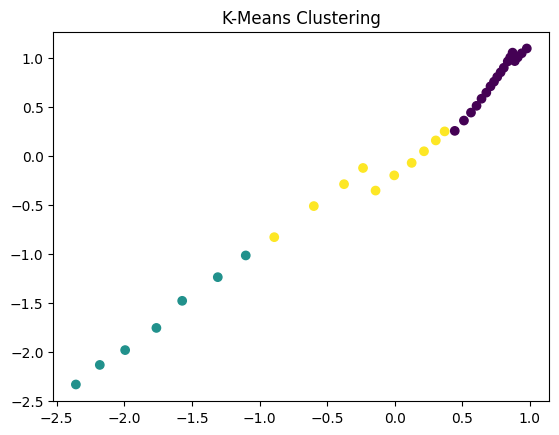

In [27]:
# Define features without dropping rows
features = cleaned_eda[stages + ['Supply']]
features = features.fillna(features.mean())

# Call in the StandardScaler
scaler = StandardScaler()

# and use it on the features
X_scaled = scaler.fit_transform(features)

# Create K-Means model
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit to features
kmeans.fit(X_scaled)

# All the preparation is finally complete.
# We now apply the cluster labels back to cleaned_eda
cleaned_eda.loc[features.index, 'Cluster'] = kmeans.labels_

# Plot the clusters using the first two scaled features
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_)
plt.title('K-Means Clustering')
plt.show()

Some observations we can make from this plot is that the clusters are well-separated. This could indicate that there are meaningful differences in the stages of completion driven by Supply.

Obviously these clusters resemble a linear progression. This is because the phases are from the same underlying process (rate of Supply).

### <b>Advanced Analysis Techniques</b>

<b>Clustering Analysis</b>

####

Another way we can plot the KMeans Cluster is through a Principal Component Analysis (PCA). With new a new dimension, we can capture the maximum variance of the data.

A PCA helps us understand which original features contribute most to each principal component.

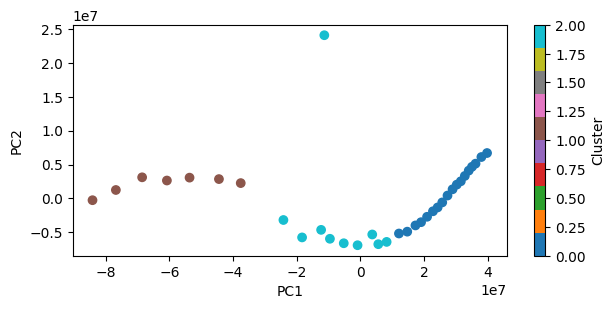

<Figure size 640x480 with 0 Axes>

In [28]:
from sklearn.decomposition import PCA

def pca_scatter(X, labels, label_name):
    pca = PCA(n_components=2)
    components = pca.fit_transform(X)
    fig, ax = plt.subplots(figsize=(7, 3))
    scatter = ax.scatter(components[:, 0], components[:, 1], c=labels, cmap='tab10')
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    plt.colorbar(scatter, ax=ax, label=label_name)
    plt.show()

pca_scatter(features, kmeans.labels_, 'Cluster')
plt.savefig('test.png')

It's clear from this 2D form that the PCA results resemple a parabolic curve. This would suggest the suppy data has a non-linear relationship with the completion stages. They instead follow a curved progression.

In [29]:

# Optional: Show cluster distribution
print("Cluster distribution:")
unique, counts = np.unique(kmeans.labels_, return_counts=True)
for cluster, count in zip(unique, counts):
    print(f"Cluster {cluster}: {count} points ({count/len(kmeans.labels_)*100:.1f}%)")

Cluster distribution:
Cluster 0: 18 points (51.4%)
Cluster 1: 7 points (20.0%)
Cluster 2: 10 points (28.6%)


Analyzing the results further it appears the largest is Cluster 0 with 18 points which explains 51.4% of the data.

### Approach Introduction

In this approach, we will be predicting the population of the different stages using Supply. Machine learning brings powerful perspective to the data by allowing us make decisions based on future values.

Perhaps in an effort to cut costs, drug manufacturers need to understand if changing supply will affect how long people will continue taking the vaccine. The answer may be obvious, but it is meaningful to have confirmation and exact knowledge of at what stage this might happen.

In the Exporatory Data Analysis performed prior, it was shown that supply is negatively affected most after the first stage of `Additional_Doses`. Supply numbers start to decrease in correlation with the stage after this and the cause is supported by the accruacy of the Linear Regression model and p value of 0.

Taking a machine learning approach helps clear the uncertainty. Given more time, would the Supply numbers increase or decrease further? This question can be answered with the `RandomForestClassifier` from sklearn.

### Background Information

##### About Random Forest and Ensemble Methods

The RandomForest Classifier is an <b>ensamble method</b> which combines many models to create stronger ones that will minimize bias (average error between ovsesved and predicted values), or minimuze the variance.

This matters because the aim is to balance between overfitting and underfitting. Overfitting happens when the variables of complex models is too high. Underfitting occurs when the simple models used in the emsamble method have too high of a bias.

##### Why Random Forest?

Since the PCA plot showed a parabolic pattern, it is a non-linear relationship which RandomForsest is suited to process.

#### Random Forest

Begin preparing the Data

In [30]:
# Prepare data
X = features
y = kmeans.labels_

Run test train split

In [31]:
# Split and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

Let's revisit the PCA 3D scatterplot with the new prediction data. 

In [32]:

# Evaluate
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")

# Prediction function
def predict_cluster(stage_values):
    input_data = [[stage_values[stage] for stage in stages]]
    return model.predict(input_data)[0]

Accuracy: 1.000


### Predictions

Plot the predictions using a PCA scatter plot.

<Figure size 500x300 with 0 Axes>

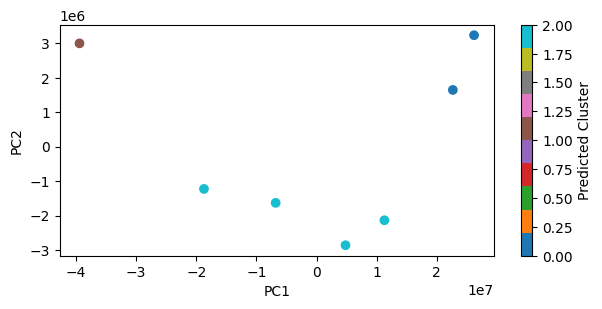

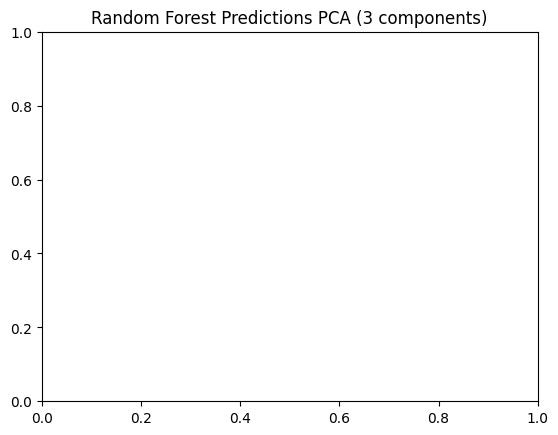

In [33]:
# Plot Random Forest predictions on test set
plt.figure(figsize=(5, 3))
pca_scatter(X_test, y_pred, 'Predicted Cluster')
plt.title('Random Forest Predictions PCA (3 components)')
plt.show()


The organized nature of this PCA plot aligns with the accuracy. Clusters do not overlap and PC1 is almost perfectly 1-dimensional. It follows a consistent pattern much like the PCA plot before. 

A 100% accuracy may seem strange, and it very well could be true. This might be the result of overfitting, even with RandomForsest. Or it could be that these predictions were too obvious for such a complex model. There wouldn't be enough data variation to make complex accurate predictions.

### <b>Conclusion</b>

In this notebook we explored the affects of Supply on the different stages of COVID-19 vaccine comepletion. By creating a `Supply` field correlation was found at it's highest in the early stages of patient therapy but stopped growth after the first completed Series and started to decline after any Additional Doses before the Second Booster.

Identifying outliers, the US value from the `Location` field held all of the population in the Second Booster. However, it was found that this was not reflected in the data and each stage can be analyzed independently.

The null hypothesis was accepted that Supply has an affect on the stages of vaccine completion. At least one of the stages are affected by supply, and the performed predictions support this hypothesis.